In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

### Train data

In [2]:
train = pd.read_csv('../../ml-data/cyberattack_detection/3_selected_features/A1_train_data_PCA.csv', sep=',')

In [3]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(train.values)

KMeans(n_clusters=3, random_state=0)

### Test data

In [4]:
test = pd.read_csv('../../ml-data/cyberattack_detection/3_selected_features/A1_test_data_PCA.csv', sep=',')

In [5]:
test_predict = kmeans.predict(test)

In [6]:
test['cluster'] = test_predict
test['cluster'].value_counts()

0    1048137
1       5703
2          5
Name: cluster, dtype: int64

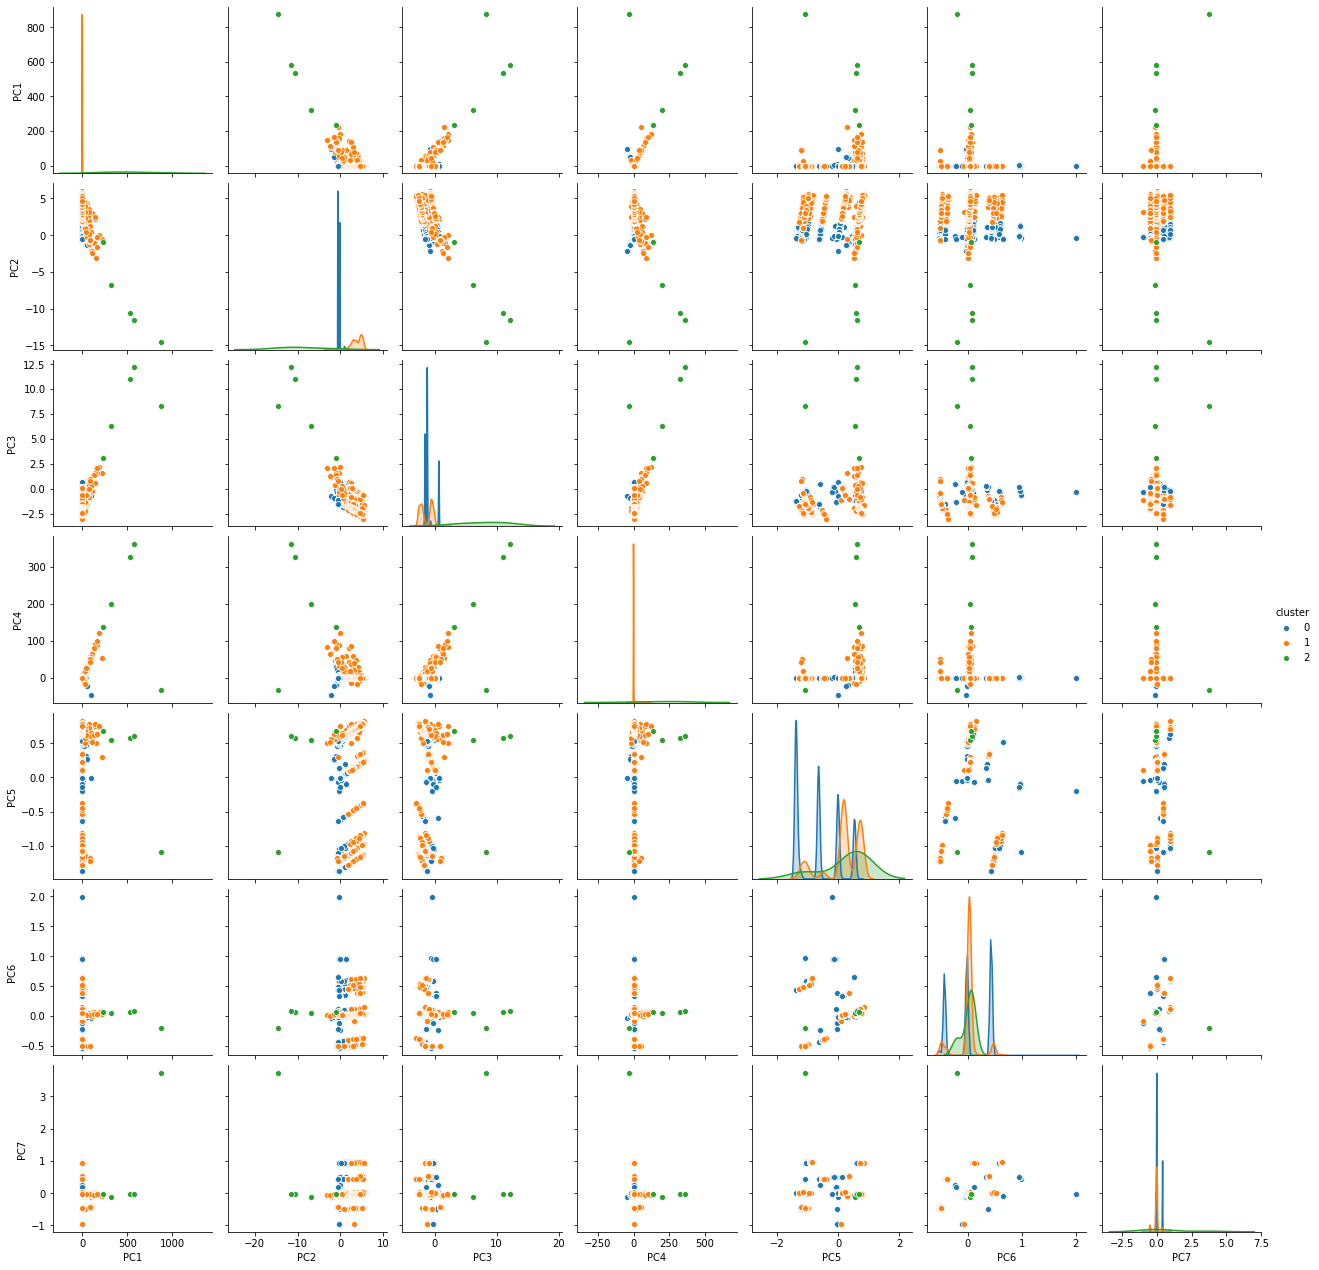

In [29]:
sns.pairplot(test, hue = 'cluster')

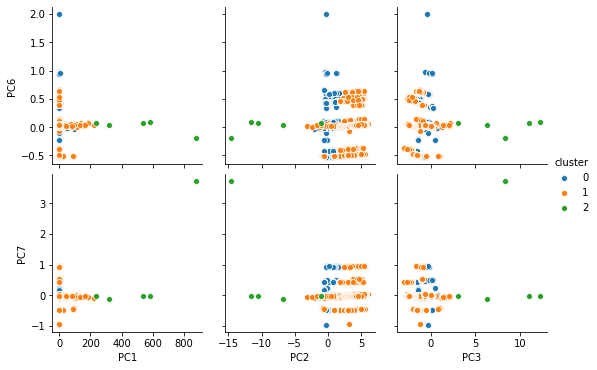

In [31]:
sns.pairplot(
    test, hue = 'cluster',
    x_vars=["PC1", "PC2", "PC3"],
    y_vars=["PC6", "PC7"],
)

In [7]:
test.shape

(1053845, 8)

In [22]:
original_test = pd.read_csv('../../ml-data/cyberattack_detection/1_raw_data/A2_1/clean_test_data', sep=',')

In [23]:
original_test.shape

(1053845, 14)

In [24]:
original_test['cluster'] = test_predict

In [25]:
original_test.head()

,Timestamp,Duration,Protocol,SrcIPAddress,SrcPort,Direction,DestIPAddress,DestPort,State,SrcTypeService,DestTypeService,TotalPackets,TotalBytes,SourceBytes,cluster
0,2012/12/01 03:36:40.878146,3709.429059,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,84,6191,3951,1
1,2012/12/01 03:51:49.918983,3309.740162,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,77,6082,3959,1
2,2012/12/01 04:07:21.899558,3432.626766,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,85,6225,3813,1
3,2012/12/01 04:38:46.872983,3570.183838,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,94,7579,4131,1
4,2012/12/01 04:53:55.866280,3397.426792,tcp,138.11.74.16,6667,->,201.30.94.155,1027,PA_PA,0.0,0.0,79,6182,3610,1


In [26]:
anomalies_orig_feat = original_test.loc[original_test['cluster'].isin([1,2])]

In [27]:
anomalies_orig_feat['cluster'].value_counts()

1    5703
2       5
Name: cluster, dtype: int64

In [28]:
anomalies_orig_feat.to_csv('../4 Results/A1_test_KMean_PCA_orig_feat.csv', sep=',')

End